# Big Mart Sales Prediction

The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

- Business Goal : Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
- Type of problem: Supervised Learning problem
- Target feature : Item_Outlet_Sales

## Importing Libraries and reading the data

In [215]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [216]:
# filter warnings

warnings.filterwarnings('ignore')

In [217]:
# read the data

data = pd.read_csv('dataset/train.csv')

In [218]:
# display 5 random rows

data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6716,NCZ17,12.15,Low Fat,0.079593,Health and Hygiene,37.3506,OUT045,2002,NaN,Tier 2,Supermarket Type1,645.1602
1599,FDW20,NaN,Low Fat,0.024032,Fruits and Vegetables,124.9730,OUT027,1985,Medium,Tier 3,Supermarket Type3,2463.4600
737,FDA10,20.35,Low Fat,0.000000,Snack Foods,120.9072,OUT049,1999,Medium,Tier 1,Supermarket Type1,1470.0864
8165,FDD39,NaN,Low Fat,0.069815,Dairy,214.3850,OUT027,1985,Medium,Tier 3,Supermarket Type3,4327.7000
1985,FDN09,14.15,LF,0.035017,Snack Foods,245.3828,OUT018,2009,Medium,Tier 3,Supermarket Type2,1705.7796


## Finding the Number of Rows and Columns of the Dataset

In [219]:
# find the shape

data.shape

(8523, 12)

## Get info about the dataset

In [220]:
# describe the data
 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking for null values 

In [221]:
# check for null values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [222]:
# finding percentage of missing values

# isnull() returns a dataframe with True and False values

# if missing value percentages were below 5 it would be okay to drop them

data.isnull().sum() * 100 / len(data)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<mark>Here we can see that Item_weight Column has 1463 (17%) empty values, and Outlet_Size has 2410 (28%) empty values.</mark>

## Duplicate Values

In [223]:
# duplicate values

# .duplicate() returns a boolean series denoting duplicate rows

data.duplicated().any()

False

<mark>There are no duplicate rows in the dataset</mark>

## Handling the missing values

### Item_Weight

- Two main methods to handle missing values for numerical data, univariate and multivariate imputation

- Univariate imputation is filling missing values with the column containing the missing values, for example mean, median, mode etc.

- Multivariate imputation is filling missing values with the other columns as well as the column containing the missing values, for example regression, KNN, ML etc.

#### Univariate Imputation

In [224]:
# Item_Weight Missing Values

mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

print(mean_weight,median_weight)

12.857645184135976 12.6


In [225]:
# filling missing values with mean

data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [226]:
# display the data

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


##### Finding Variance

- variance is the spread or distance of data points from the mean

- variance decreases after mean imputation

- these changes should not result in a significant difference in variance

In [227]:
# finding the variance

print('Original Variance: ', data['Item_Weight'].var())
print('Variance after mean imputation: ', data['Item_Weight_mean'].var())
print('Variance after median imputation: ', data['Item_Weight_median'].var())

Original Variance:  21.561688259836558
Variance after mean imputation:  17.86012173506058
Variance after median imputation:  17.869561454073647


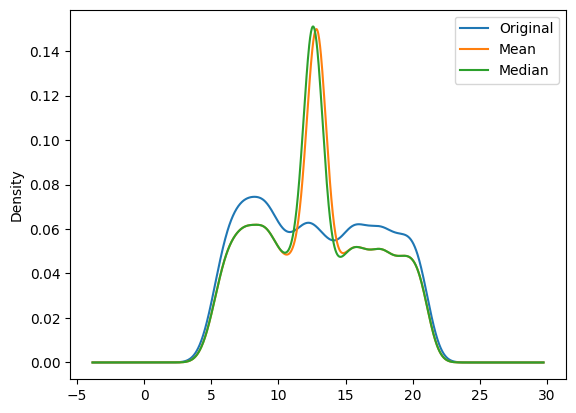

In [228]:
# distribution of Item_Weight column and its mean and median imputed versions

# KDE plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.

data["Item_Weight"].plot(kind='kde', label='Original')
data["Item_Weight_mean"].plot(kind='kde', label='Mean')
data["Item_Weight_median"].plot(kind='kde', label='Median')

plt.legend()
plt.show()

<Axes: >

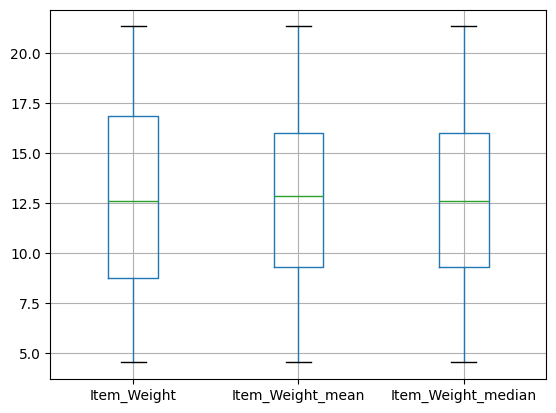

In [229]:
# box plot for Item_Weight, Item_Weight_mean, and Item_Weight_median

data[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()

<mark>After doing the imputation data distribution has been altered, we can see that most values are clustered around the mean/median, this is not desirable</mark>

In [230]:
# Fill in missing values with interpolate pandas method

# linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points, it estimates the missing values by drawing a straight line between 2 neighboring values and filling the missing values with the values along that line.

data['Item_Weight_interpolate'] = data['Item_Weight'].interpolate(method='linear')

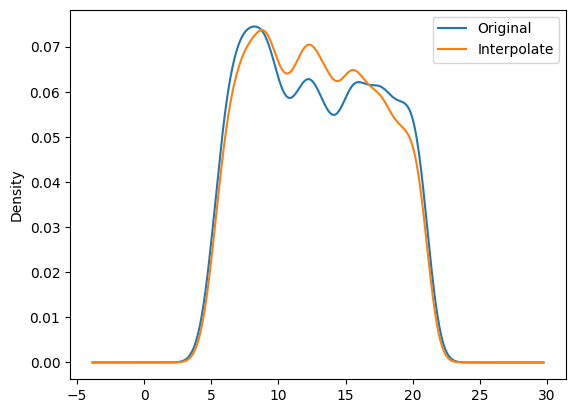

In [231]:
# plot distribution of Item_Weight and Item_Weight_interpolate

data["Item_Weight"].plot(kind='kde', label='Original')
data["Item_Weight_interpolate"].plot(kind='kde', label='Interpolate')

plt.legend()
plt.show()

#### Multivariate Imputation

- K-Nearest Neighbors Imputation to fill in missing values

In [232]:
# import KNNImputer

from sklearn.impute import KNNImputer

In [233]:
# create an instance of KNNImputer

knn = KNNImputer(n_neighbors = 10, weights="distance")

In [234]:
# fit into knn_imputer column

data['knn_imputer'] = knn.fit_transform(data[["Item_Weight"]]).ravel()

# the fit_transform method expects the input to be a 2D array, thus you use double square brackets to select the column
# the ravel method is used to convert the 2D array to a 1D array

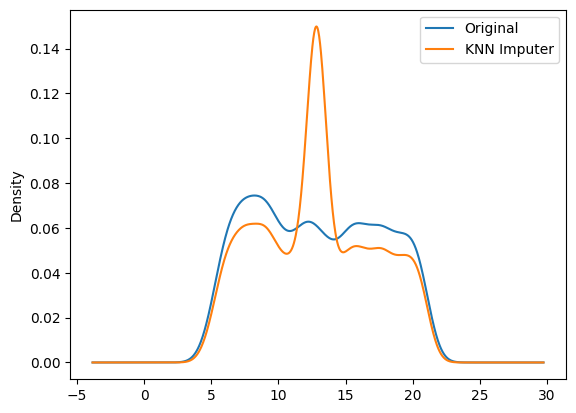

In [235]:
# plot variance for Item_Weight and knn_imputer

data["Item_Weight"].plot(kind='kde', label='Original')
data["knn_imputer"].plot(kind='kde', label='KNN Imputer')

plt.legend()
plt.show()

<mark>KNN Imputation also clusters its missing values around the mean, thus we can say that the preferred method for filling in missing values for Item_weights is linear interpolation, we can then remove the other columns and keep only our linear interpolation column</mark>

In [236]:
# remove the other columns

data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis = 1)

# axis = 1 means column
# axis = 0 means row

In [237]:
# display data

data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


### Outlet_Size

- since Outlet_Size is categorical data, we cannot use mean or median to fill in our missing values. We have to use the mode (most frequently occuring)

- but for this dataset, we can use the Outlet_Type column to fill in our missing values for Outlet_Size 

In [238]:
# value counts for Outlet_Size

data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [239]:
# value counts for Outlet_Type

data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [240]:
# find the mode of Outlet_Size for each Outlet_Type

mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

# fill missing values in Outlet_Size with the mode of Outlet_Size for each Outlet_Type
# aggfunc=(lambda x: x.mode()[0]) returns the mode of the Outlet_Size for each Outlet_Type, the 0 index is used to get the first value of the mode, if there are multiple modes

In [241]:
# fill missing values in Outlet_Size with the mode of Outlet_Size for each Outlet_Type

missing_values = data['Outlet_Size'].isnull()

missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [242]:
# fill in the values

data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [243]:
# check missing values

data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64